In [25]:
from glob import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

Pandas Version: 1.2.1
Matplotlib Version: 3.3.3
Seaborn Version: 0.11.1


In [29]:
SENSITIVITY_ANALYSIS = "sensitivity-analysis-202104080939"
output_files = glob(f"reports/{SENSITIVITY_ANALYSIS}/model-*/out.csv")

model_param = pd.read_csv(f"reports/{SENSITIVITY_ANALYSIS}.csv")
model_param.reset_index(inplace=True)
model_param["index"] = model_param["index"] + 1
model_param.rename(columns={"index": "model"}, inplace=True)

df = None
for file in output_files:
    tmp_df = pd.read_csv(file)
    # Get the model run number
    tmp_df["model"] = file.split("\\")[1].split('-')[1] 
    if df is None:
        df = tmp_df
    else:
        df = pd.concat([df, tmp_df])
df["model"] = df["model"].astype("int64")

df = df.merge(model_param, on="model", how="inner")
df.rename(columns={"plant_counts_1": "test_plant_count", "plant_counts_2": "control_plant_count"}, inplace=True)
df["test_plant_pct"] = df["test_plant_count"]/(df["control_plant_count"] + df["test_plant_count"]) * 100
print(df.head())
print(len(df))

   year  test_plant_count  control_plant_count  model  rii_diff  seed_diff  \
0     1                57                   69      1       0.0          0   
1     2                80                  104      1       0.0          0   
2     3                98                  137      1       0.0          0   
3     4               114                  176      1       0.0          0   
4     5               132                  206      1       0.0          0   

   spread_diff  rep_cyc  test_plant_pct  
0          0.0        1       45.238095  
1          0.0        1       43.478261  
2          0.0        1       41.702128  
3          0.0        1       39.310345  
4          0.0        1       39.053254  
220


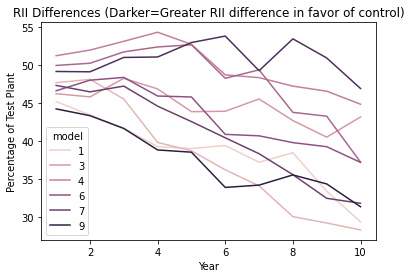

In [39]:
rii_test = df[df["model"] < 10]
fig = sns.lineplot(x="year", y="test_plant_pct", hue="model", data=rii_test).set(
    title="RII Differences (Darker=Greater RII difference in favor of control)",
    xlabel="Year",
    ylabel="Percentage of Test Plant"
)

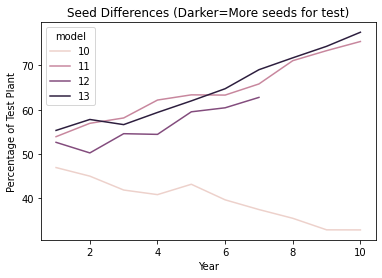

In [43]:
seed_test = df[(df["model"] >= 10) & (df["model"] < 15)]
fig = sns.lineplot(x="year", y="test_plant_pct", hue="model", data=seed_test).set(
    title="Seed Differences (Darker=More seeds for test)",
    xlabel="Year",
    ylabel="Percentage of Test Plant"
)

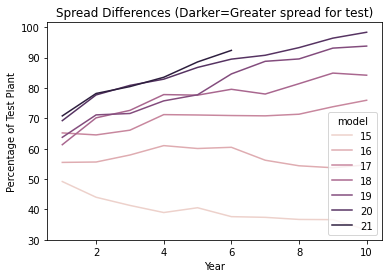

In [46]:
spread_test = df[(df["model"] >= 15) & (df["model"] < 22)]
fig = sns.lineplot(x="year", y="test_plant_pct", hue="model", data=spread_test).set(
    title="Spread Differences (Darker=Greater spread for test)",
    xlabel="Year",
    ylabel="Percentage of Test Plant"
)

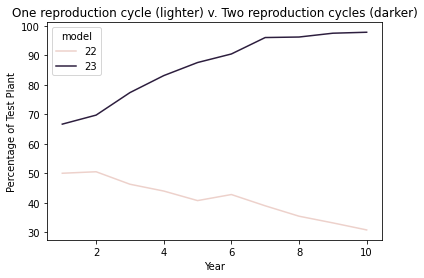

In [47]:
repr_test = df[(df["model"] >= 22)]
fig = sns.lineplot(x="year", y="test_plant_pct", hue="model", data=repr_test).set(
    title="One reproduction cycle (lighter) v. Two reproduction cycles (darker)",
    xlabel="Year",
    ylabel="Percentage of Test Plant"
)

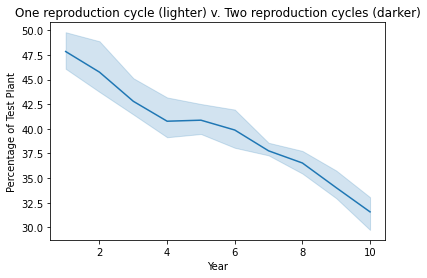

In [49]:
repr_test = df[df["model"].isin([1,10,15,22])]
fig = sns.lineplot(x="year", y="test_plant_pct", data=repr_test).set(
    title="Stability Test (Plants are equally matched)",
    xlabel="Year",
    ylabel="Percentage of Test Plant"
)